# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(200)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Loop through cities making the API call
i = 1
for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()    
    
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City name not available.")

Processing record 1|cherskiy
Processing record 2|rio gallegos
Processing record 3|faya
Processing record 4|pemba
Processing record 5|leninskoye
Processing record 6|rikitea
Processing record 7|jamestown
Processing record 8|deputatskiy
Processing record 9|victoria
Processing record 10|tiksi
Processing record 11|egvekinot
Processing record 12|dikson
Processing record 13|khatanga
Processing record 14|baykit
Processing record 15|albany
Processing record 16|provideniya
Processing record 17|saldanha
Processing record 18|hermanus
Processing record 19|tuktoyaktuk
Processing record 20|iqaluit
Processing record 21|ternate
Processing record 22|tasiilaq
Processing record 23|cabo san lucas
Processing record 24|kamina
Processing record 25|mount pleasant
Processing record 26|hithadhoo
Processing record 27|jalu
Processing record 28|kapaa
Processing record 29|leningradskiy
Processing record 30|balykshi
Processing record 31|lompoc
Processing record 32|mataura
Processing record 33|ushuaia
Processing recor

Processing record 248|ciudad bolivar
Processing record 249|huambo
City name not available.
Processing record 250|namatanai
Processing record 251|torre-pacheco
Processing record 252|airai
Processing record 253|srednekolymsk
Processing record 254|kenai
Processing record 255|basqal
Processing record 256|fortuna
Processing record 257|boende
Processing record 258|kavaratti
Processing record 259|saint-augustin
City name not available.
Processing record 260|kahului
Processing record 261|college
Processing record 262|villazon
Processing record 263|hay river
Processing record 264|grindavik
Processing record 265|svetlogorsk
Processing record 266|kichera
Processing record 267|san ignacio
Processing record 268|vavatenina
Processing record 269|richards bay
Processing record 270|teyateyaneng
Processing record 271|heihe
Processing record 272|thompson
Processing record 273|voyvozh
Processing record 274|carahue
Processing record 275|masterton
Processing record 276|coquimbo
Processing record 277|darab
P

Processing record 491|cayenne
Processing record 492|colac
Processing record 493|gorshechnoye
Processing record 494|nizhneangarsk
Processing record 495|santa marta
Processing record 496|tecoanapa
Processing record 497|ozernovskiy
Processing record 498|mackay
Processing record 499|sijunjung
City name not available.
Processing record 500|okhotsk
Processing record 501|christchurch
Processing record 502|zaozerne
Processing record 503|itoman
Processing record 504|biak
Processing record 505|poitiers
Processing record 506|alta floresta
Processing record 507|yingcheng
Processing record 508|martapura
Processing record 509|folldal
Processing record 510|sorrento
Processing record 511|teeli
City name not available.
Processing record 512|tukrah
Processing record 513|maniitsoq
Processing record 514|sulangan
Processing record 515|nevel
Processing record 516|kununurra
Processing record 517|terrace
Processing record 518|russell
Processing record 519|nicolas bravo
Processing record 520|bikin
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,2,RU,1612482224,74,68.7500,161.3000,-11.4,10.60
1,Río Gallegos,0,AR,1612482431,28,-51.6226,-69.2181,69.8,27.63
2,Faya,0,SA,1612482186,76,18.3851,42.4509,59.0,5.75
3,Pemba,20,MZ,1612482431,89,-12.9740,40.5178,78.8,3.44
4,Kazygurt,0,KZ,1612482431,48,41.7589,69.3864,39.2,11.50


In [6]:
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_df.loc[city_df['Humidity'] > 100]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

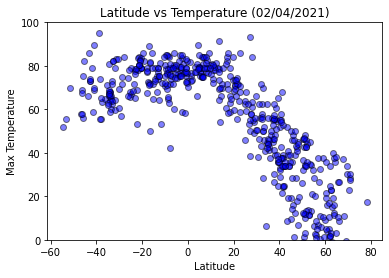

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df['Lat'], city_df['Max Temp'], facecolors = 'blue', edgecolors='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Latitude vs Temperature ({today})")
plt.ylim(0, 100)

plt.savefig("output_data/Latitude vs Temperature.png")

The highest temperature is found at 0 latitude. As latitude increases, the temperature seems to decrease. 

## Latitude vs. Humidity Plot

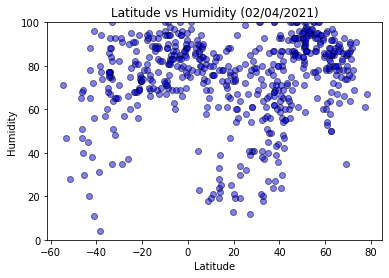

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df['Lat'], city_df['Humidity'], facecolors='blue', edgecolors='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity ({today})")
plt.ylim(0, 100)

plt.savefig("output_data/Latitude vs Humidity.png")

Most of the latitudes have high humidity. Some of the latitudes have the same humidity measures and vice versa.   

## Latitude vs. Cloudiness Plot

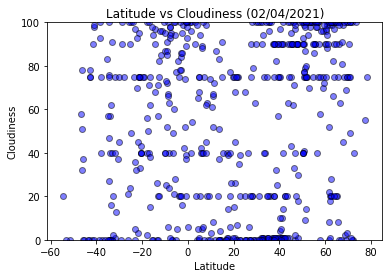

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df['Lat'], city_df['Cloudiness'], facecolors='blue', edgecolors='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness ({today})")
plt.ylim(0, 100)

plt.savefig("output_data/Latitude vs Cloudiness.png")

There is not a relationship between latitude and cloudiness. The cloudiness was spread across the latitude. 

## Latitude vs. Wind Speed Plot

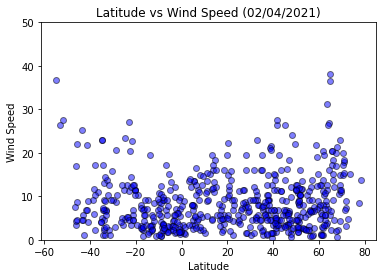

In [12]:
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df['Lat'], city_df['Wind Speed'], facecolors='blue', edgecolors='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed ({today})")
plt.ylim(0, 50)

plt.savefig("output_data/Latitude vs Wind Speed.png")

Most of the latitudes have low wind speed. Some of the latitudes have the same wind speed and vice versa.   

## Linear Regression

In [13]:
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return [line_eq, rvalue]

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [14]:
northern_df = city_df.loc[city_df["Lat"] >= 0]
southern_df = city_df.loc[city_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7407605512946231


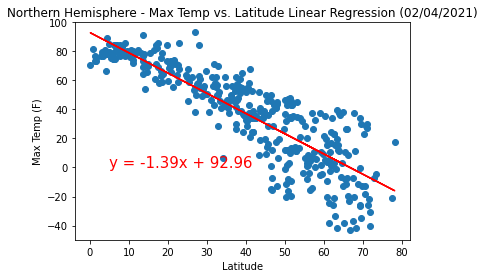

In [24]:
equation = linear_regression(northern_df["Lat"], northern_df["Max Temp"])

annotate(equation[0], 5, 0)

plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a negative correlation between latitude and max temperature in the Northern Hemisphere. As the latitude increases, the max temp decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.11740695856877288


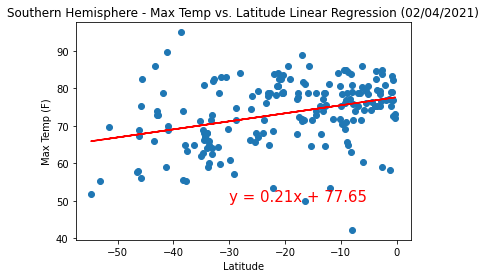

In [16]:
equation = linear_regression(southern_df["Lat"], southern_df["Max Temp"])
annotate(equation[0], -30, 50)

plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and max temperature in the Southern Hemisphere. As the latitude increases, so does the max temp.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.07926370008958081


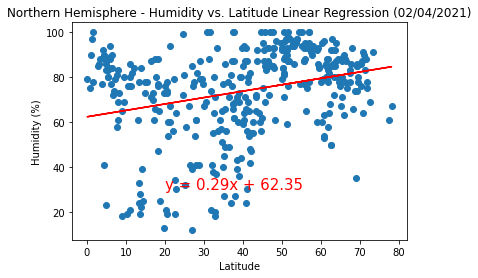

In [25]:
equation = linear_regression(northern_df["Lat"], northern_df["Humidity"])

annotate(equation[0], 20, 30)

plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and humidity in the Northern Hemisphere. As the latitude increases, so does the humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.26326456436550727


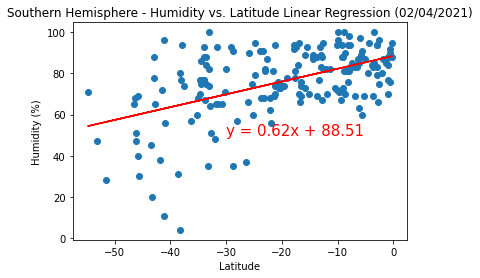

In [18]:
equation = linear_regression(southern_df["Lat"], southern_df["Humidity"])
annotate(equation[0], -30, 50)

plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and humidity in the Southern Hemisphere. As the latitude increases, so does the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.09640782857037673


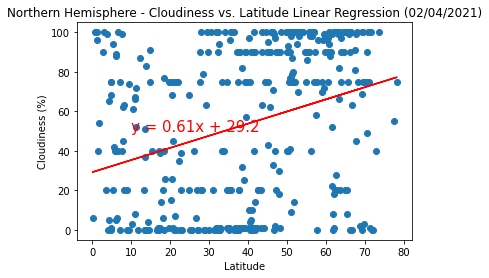

In [19]:
equation = linear_regression(northern_df["Lat"], northern_df["Cloudiness"])

annotate(equation[0], 10, 50)

plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and cloudiness in the Northern Hemisphere. As the latitude increases, so does the cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08147308541242969


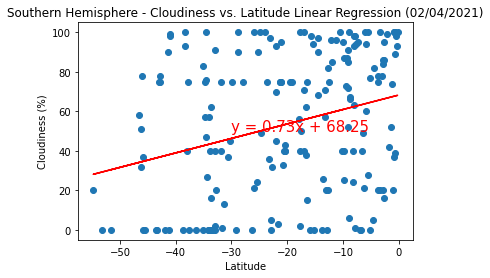

In [20]:
equation = linear_regression(southern_df["Lat"], southern_df["Cloudiness"])
annotate(equation[0], -30, 50)

plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and cloudiness in the Southern Hemisphere. As the latitude increases, so does the cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.017688890099026352


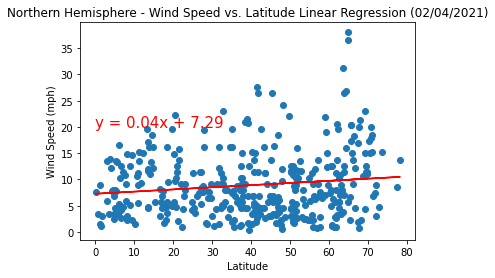

In [21]:
equation = linear_regression(northern_df["Lat"], northern_df["Wind Speed"])
annotate(equation[0], 0, 20)

plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and wind speed in the Northern Hemisphere. As the latitude increases, so does the wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.14525194564180247


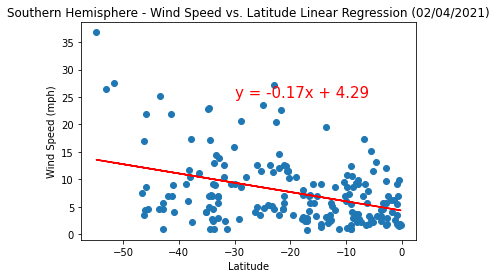

In [28]:
equation = linear_regression(southern_df["Lat"], southern_df["Wind Speed"])
annotate(equation[0], -30, 25)

plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a negative correlation between latitude and wind speed in the Southern Hemisphere. As the latitude increases, the wind speed decreases.

# Observations

* The temperature is the only variable with a strong relationship with latitude.

* Humidity, cloudiness, and wind speed have such weak relationships with latitude. It’s almost as if there is no relationship at all.

* Majority of the relationships between the variables are positive.